### Context and Data Understanding 🌛 🌜

**Description**
- A startup or start-up is a company or project undertaken by an entrepreneur to seek, develop, and validate a scalable business model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. At the beginning, startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential.
- Dataset gives information about the countries and cities with best ecosystem for startups in 2021
- There are in total 100 countries and 983 cities on the ranking. 
- The metrics of ranking: Total Score = Quantity Score + Quality Score + Business Score 
- Quantity Score: Metrics related to Quantity (for eg: Number of Start-up, Number of co-working Space,...)
- Quality Score:  Metrics related tp Quality 
- Business Score: Combination of Business and Economic indicators 

![](https://wiki.tino.org/wp-content/uploads/2021/06/startup-la-gi-5.png)

### Import Packages and Datasets 🐠

In [1]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

In [2]:
# See all csv files in the folder 🐯
import os
files = [f for f in os.listdir() if f.endswith(".csv")]
print(files)

['Best Cities for Startups.csv', 'Best Countries for Startups.csv']


In [52]:
country_data= pd.read_csv('Best Countries for Startups.csv')
city_data= pd.read_csv('Best Cities for Startups.csv')
display(country_data.head(3), city_data.head(3))

,ranking,change in position from 2020,country,total score,quantity score,quality score,business score,change in position sign
0,1.0,0,United States,124.420,19.45,101.17,3.80,NaN
1,2.0,0,United Kingdom,28.719,8.16,16.86,3.70,NaN
2,3.0,0,Israel,27.741,5.48,19.14,3.13,NaN


,position,change in position from 2020,city,country,total score,quatity score,quality score,business score,sign of change in position
0,1,0,San Francisco Bay,United States,328.966,29.14,296.02,3.80,NaN
1,2,0,New York,United States,110.777,11.43,95.55,3.80,NaN
2,3,3,Beijing,China,66.049,5.01,58.61,2.43,+


### Data Pre-processing 🐉

- **Drop Duplicates and Unnecessary Columns** 🐟

In [53]:
# We drop all the duplicate rows in both datasets 
country_data.drop_duplicates(subset='country', inplace=True)
city_data.drop_duplicates(subset='city', inplace=True)

- Since I see the columns change in position from 2020 and sign of change is not of much use, I drop them for simplicity 

In [54]:
country_data.drop(['change in position from 2020','change in position sign '], axis=1, inplace=True)
city_data.drop(['change in position from 2020','sign of change in position'], axis=1, inplace=True)

# The quantity column in city data is wrongly named 🥜
city_data.columns= ['position', 'city', 'country', 'total score', 'quantity score',
       'quality score', 'business score']

# We strip out the white space of countries and cities' names 🍛
country_data['country']= country_data['country'].str.strip()
city_data['city']=city_data['city'].str.strip()
city_data['country']=city_data['country'].str.strip()

In [55]:
# Now, we add a new column to both dataset which is the abbreviation of country's name
import pycountry
def Country_code (country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return ("NA")
# For example, for Australia...
Country_code('Australia')

'AUS'

In [56]:
country_data['country code']= country_data['country'].apply(lambda x: Country_code(x))
city_data['country code']= city_data['country'].apply(lambda x: Country_code(x))
display(country_data.head(3), city_data.head(3))

,ranking,country,total score,quantity score,quality score,business score,country code
0,1.0,United States,124.420,19.45,101.17,3.80,USA
1,2.0,United Kingdom,28.719,8.16,16.86,3.70,GBR
2,3.0,Israel,27.741,5.48,19.14,3.13,ISR


,position,city,country,total score,quantity score,quality score,business score,country code
0,1,San Francisco Bay,United States,328.966,29.14,296.02,3.80,USA
1,2,New York,United States,110.777,11.43,95.55,3.80,USA
2,3,Beijing,China,66.049,5.01,58.61,2.43,CHN


### Basic EDA (Exploratory Data Analysis) 🌍

### Country Dataset 🍨

**Histogram of all ranking metrics** 🍒

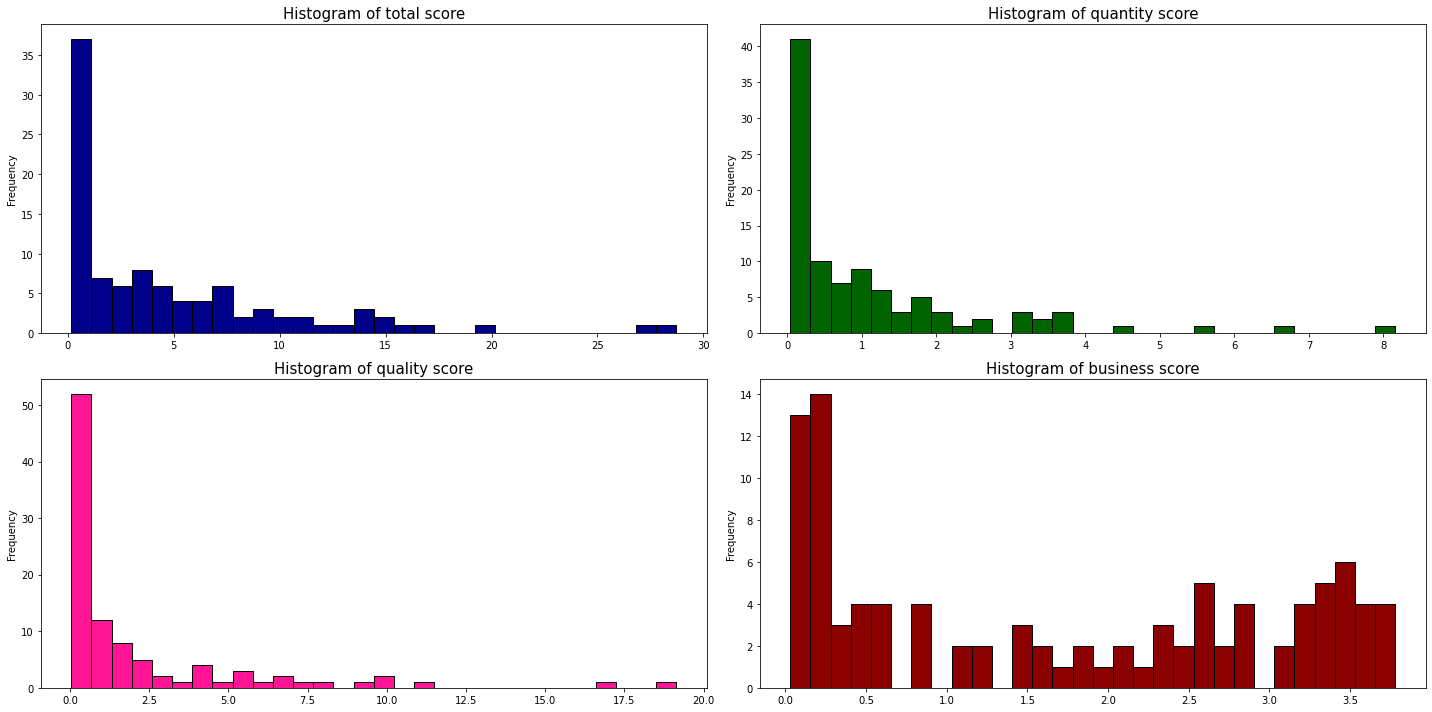

In [102]:
# Note: We exclude figures for US here as this country has exceptially high values in all metrics
col=['total score', 'quantity score', 'quality score','business score']
color=['darkblue','darkgreen','deeppink','darkred']
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax_index=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
for i in range(4):
    country_data.loc[1:,col[i]].plot.hist(bins=30,color=color[i],ax=ax_index[i], edgecolor='black')
    ax_index[i].set_title(f'Histogram of {col[i]}', fontsize=15)
fig.tight_layout();

**Top 10 Countries by Total score** 🥐

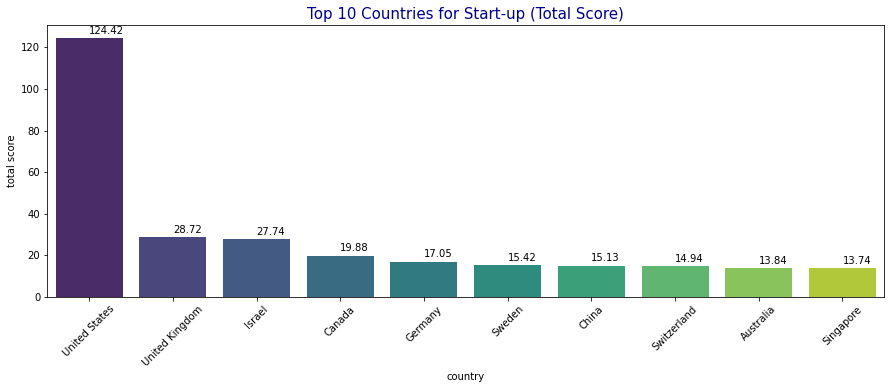

In [51]:
country_data_1= country_data.head(10)
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='country', y='total score', data= country_data_1, palette='viridis', ax=ax)
ax.set_title('Top 10 Countries for Start-up (Total Score)', fontsize=15, color='darkblue')
ax.tick_params(axis='x', labelrotation=45)
for i,v in enumerate(country_data_1['total score'].tolist()):
    ax.text(x=i, y=v+2, s=f"{np.round(v,2)}" , fontdict=dict(fontsize=10))

In [79]:
country_data.loc[1:,'total score'].mean()

4.8775959595959595

Interpretation:
- We can see that US dominate the ranking with exceptionally high total score up to 124.42, while most of total scores lie around 0->5 (histogram)
- The average total score of all countries (except for US) is only 4.878

**Top 10 Countries total score comprised by Quality, Quantity and Business Score** 🍱

- Since we know that Total score is calculated as the sum of 3 different metrics (quantity, quality and business), we aim to see how each of these 3 metrics is accounted for the total score

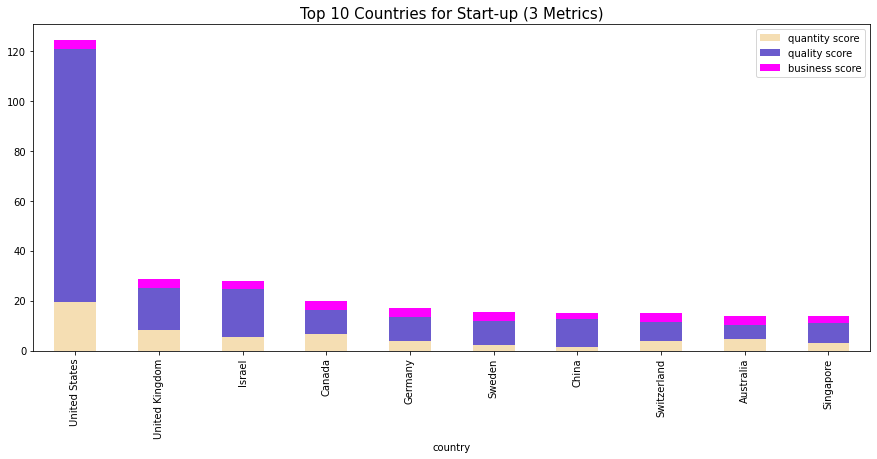

In [59]:
country_data_2= country_data.head(10)[['country','quantity score', 'quality score',
                              'business score']].set_index('country')
fig, ax=plt.subplots(figsize=(15,6))
country_data_2.plot(kind='bar', stacked=True, color=['wheat','slateblue','magenta'], ax=ax)
ax.set_title('Top 10 Countries for Start-up (3 Metrics)', fontsize=15);

Interpretation:
- Most of high total score derived from high level of quality score, we can suspect that quanlity score and total score have bidirectional causal relationship
- First, we look at the correlation matrix plot below 

**Correlation Matrix Plot** 🍓

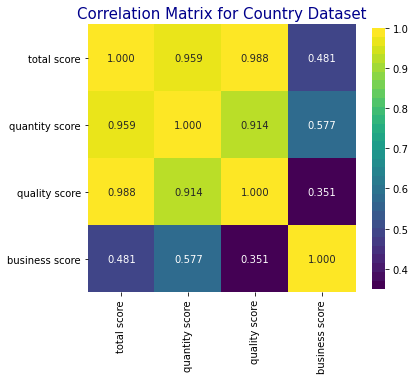

In [88]:
fig, ax= plt.subplots(figsize=(6,6))
cmap = plt.get_cmap('viridis',30)
sns.heatmap(country_data[['total score', 'quantity score', 'quality score','business score']].corr(), 
           annot=True, fmt='0.3f', square=True, cmap=cmap, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix for Country Dataset', fontsize=15, color='darkblue');

Interpretation: 
- Correlation plot above validates our suspect that total score and quality score have exceedingly high level of correlation (0.988), while business score has lowest correlation (0.481)

In [71]:
import plotly_express as px
fig= px.choropleth(country_data,locations='country code',color='total score',scope='world',
                    title='Countries for Start-up by Total Scores',
                  labels={'total score':'Total Score of Start-up'})
fig.show()

### City Dataset 🥑

**Histogram of all ranking metrics** 🥝

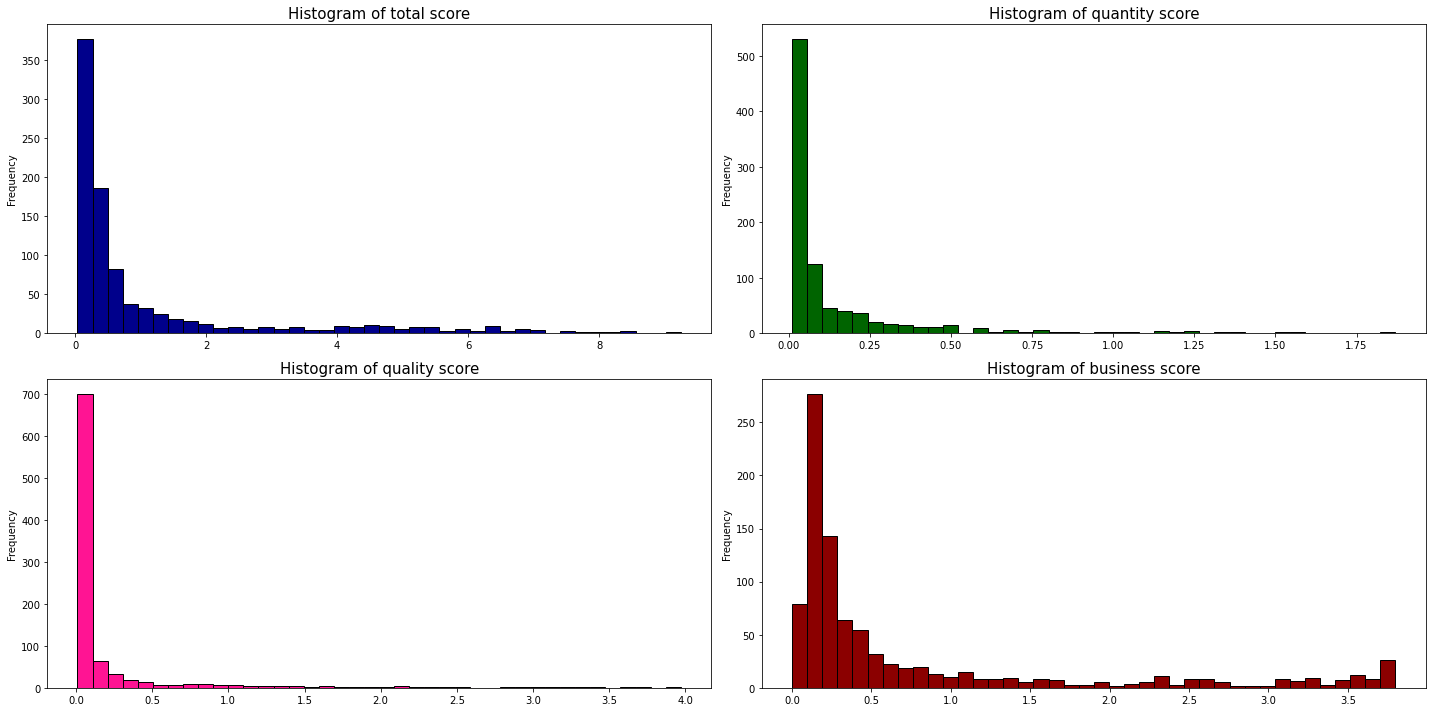

In [113]:
# Since our dataset has some outliner, we have to filter them out 
mask1= city_data['total score']<20
mask2= city_data['quantity score']<2
mask3= city_data['quality score']<4
mask= (mask1 & mask2 & mask3)
col=['total score', 'quantity score', 'quality score','business score']
color=['darkblue','darkgreen','deeppink','darkred']
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax_index=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
for i in range(4):
    city_data.loc[mask,col[i]].plot.hist(bins=40,color=color[i],ax=ax_index[i], edgecolor='black')
    ax_index[i].set_title(f'Histogram of {col[i]}', fontsize=15)
fig.tight_layout();

**Correlation Matrix Plot** 🍧

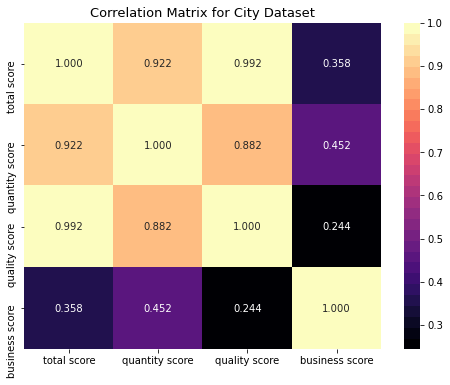

In [32]:
fig, ax= plt.subplots(figsize=(8,6))
cmap= plt.get_cmap('magma',30)
sns.heatmap(city_data[['total score', 'quantity score','quality score', 'business score']].corr(), 
           annot=True, fmt='0.3f', cmap=cmap)
ax.set_title('Correlation Matrix for City Dataset',fontsize=13);

Interpretation: 
- Similarly to the Country data, th City data also indicate a strong correlation between total score and quality score  (figure is also high for quantity score), and the lowest correlation belongs to business score. 

**Top 10 Cities by Total Score** 🧀

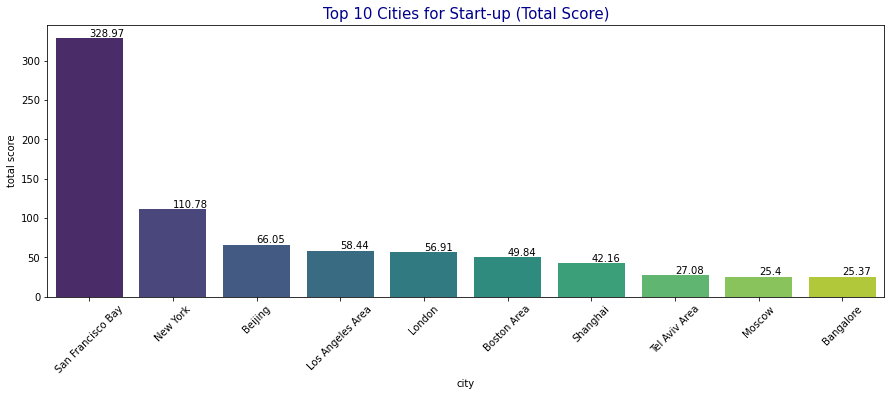

In [114]:
city_data_1= city_data.head(10)
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='city', y='total score', data= city_data_1, palette='viridis', ax=ax)
ax.set_title('Top 10 Cities for Start-up (Total Score)', fontsize=15, color='darkblue')
ax.tick_params(axis='x', labelrotation=45)
for i,v in enumerate(city_data_1['total score'].tolist()):
    ax.text(x=i, y=v+2, s=f"{np.round(v,2)}" , fontdict=dict(fontsize=10))

**Top 10 Cities total score comprised by Quality, Quantity and Business Score** 🍱

- Since we know that Total score is calculated as the sum of 3 different metrics (quantity, quality and business), we aim to see how each of these 3 metrics is accounted for the total score

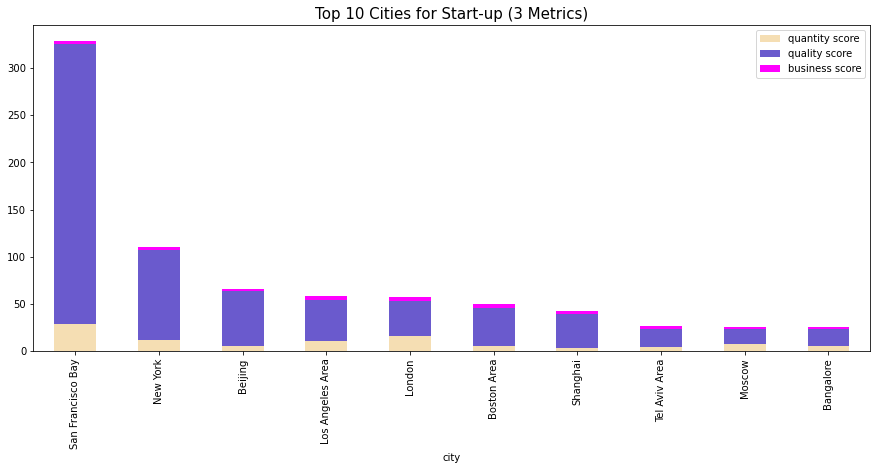

In [64]:
city_data_2= city_data.head(10)[['city','quantity score', 'quality score',
                              'business score']].set_index('city')
fig, ax=plt.subplots(figsize=(15,6))
city_data_2.plot(kind='bar', stacked=True, color=['wheat','slateblue','magenta'], ax=ax)
ax.set_title('Top 10 Cities for Start-up (3 Metrics)', fontsize=15);

Interpretation: 
- Similarly for the countries dataset, the quality score is the decisive factor determining whether the city is a great place for start-up companies. We can intuitively conclude this statement by exceedingly high correlation of quality score and total score. 

**Top 10 countries of largest amount of cities on start-ups ranking** 🍇

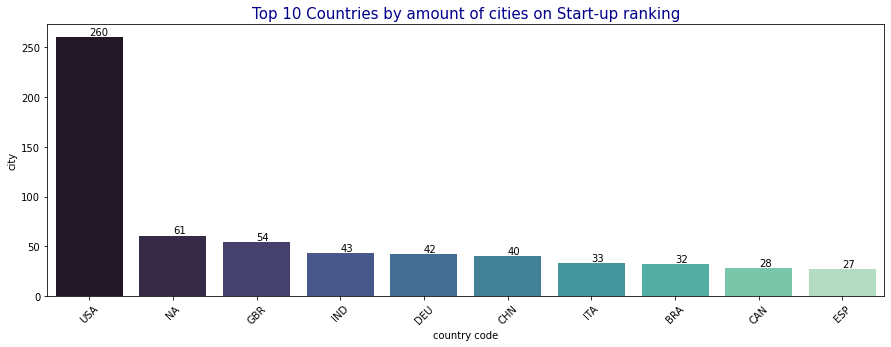

In [82]:
city_data_3 = city_data.groupby('country code',as_index=False)['city'].count().sort_values('city', ascending=False)
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='country code', y='city', data=city_data_3.head(10), ax=ax, palette='mako')
ax.set_title('Top 10 Countries by amount of cities on Start-up ranking', fontsize=15, color='darkblue')
ax.tick_params(axis='x', labelrotation=45)
for i,v in enumerate(city_data_3.head(10)['city'].tolist()):
    ax.text(x=i, y=v+2, s=v , fontdict=dict(fontsize=10))

In [88]:
fig= px.choropleth(city_data_3,locations='country code',color='city',scope='world',
                   color_continuous_scale="Viridis",
                    title='Amount of Cities in each Countries on Start-up ranking',
                  labels={'city':'Amount of cities'})
fig.show()

**Top 3 Cities of each of top 5 Countries on Start-up ranking** 🥩

- We aim to see how each cities contribute to high scoring Countries on the ranking 

In [119]:
# We have our top 5 countries are ...
country_list= country_data['country'].head(5).tolist()
country_list

['United States', 'United Kingdom', 'Israel', 'Canada', 'Germany']

In [196]:
mask= city_data['country'].isin(country_list)
city_data_4= city_data[['country', 'city', 'total score']][mask]
city_data_4 = city_data_4.groupby('country').head(3).set_index(['country','city']).sort_index()
city_data_4

total score
country        city                          
Canada         Montreal                 9.248
               Toronto                 15.678
               Vancouver               10.350
Germany        Berlin                  23.872
               Hamburg                  6.897
               Munich                  11.769
Israel         Haifa                    4.777
               Jerusalem                7.776
               Tel Aviv Area           27.084
United Kingdom Cambridge                6.373
               London                  56.913
               Manchester               6.877
United States  Los Angeles Area        58.441
               New York               110.777
               San Francisco Bay      328.966

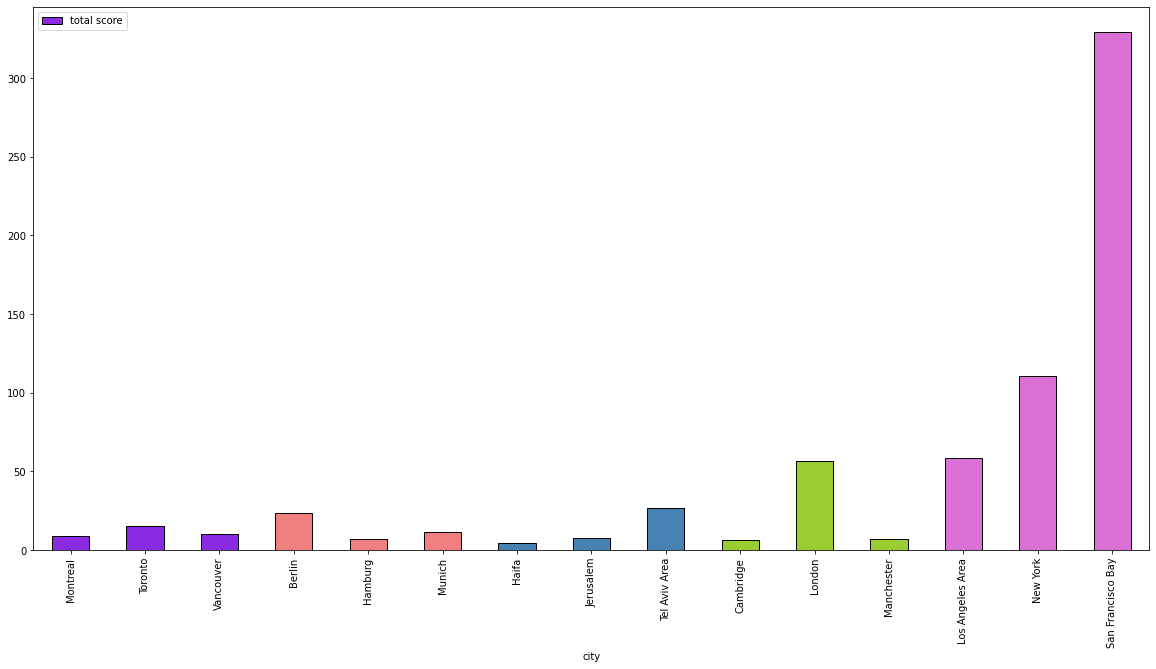

In [194]:
color= np.repeat(['blueviolet','lightcoral','steelblue','yellowgreen','orchid'],np.repeat(3,5))
fig, ax=plt.subplots(figsize=(20,10))
city_data_4.reset_index().plot.bar(x='city', y='total score',color=color, edgecolor='black', ax=ax)
ax.set_title('')
ax.legend(loc='upper left');